# Medical Insurance Charges Analysis (Linear Regression & EDA Project)

### This project dives into predicting insurance charges using customer information such as age, BMI, smoking habits, and region. By applying data analysis and regression modeling, it reveals key pricing factors and patterns.

## 🎯 Objective:
#### To analyze the insurance dataset and predict individual charges using linear regression based on input variables.

## ✨ Key Activities:
#### - Performed exploratory data analysis on both categorical and numerical features.
#### - Identified outliers and visualized the effect of smoking, BMI, and age on charges.
#### - Built a regression model and evaluated its performance using statistical metrics.
#### - Performed hyperparameter tuning.
#### - Built a final working model using PolynomialFeatures which has explained 85% of the variation on test data.

## 📄 Feature Description: Insurance Charges Dataset

| Feature     | Description                                                                 |
|-------------|-----------------------------------------------------------------------------|
| `age`       | Age of the individual (in years).                                           |
| `sex`       | Gender of the individual: male or female.                                   |
| `bmi`       | Body Mass Index — weight to height ratio (kg/m²), used to assess obesity.   |
| `children`  | Number of dependent children covered by insurance.                          |
| `smoker`    | Whether the individual smokes: yes or no.                                   |
| `region`    | Residential area in the U.S.: northeast, northwest, southeast, southwest.   |
| `charges`   | **Target variable** — Individual medical insurance cost (in US dollars).     |


In [1]:
# importing essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"G:\My Drive\Projects\medical_charges\insurance.csv") # loading dataset

df.head(20)  # displaying initial rows of data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [2]:
df.info() # checking the information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
df.describe() # statistical description of data

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.isnull().sum() # checking if there is any null value in any column

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
for feature in df.columns:  # displaying unique categories of categorical features
    if df[feature].dtypes == 'O': # if data type is object
        print("Unique categories in feature '{}' are: {} ".format(feature,df[feature].unique()))

Unique categories in feature 'sex' are: ['female' 'male'] 
Unique categories in feature 'smoker' are: ['yes' 'no'] 
Unique categories in feature 'region' are: ['southwest' 'southeast' 'northwest' 'northeast'] 


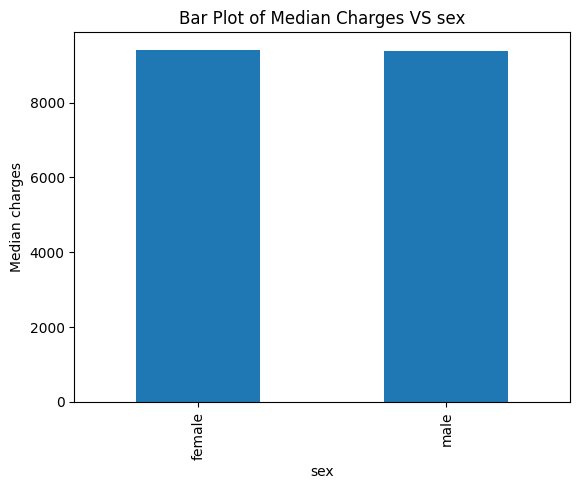

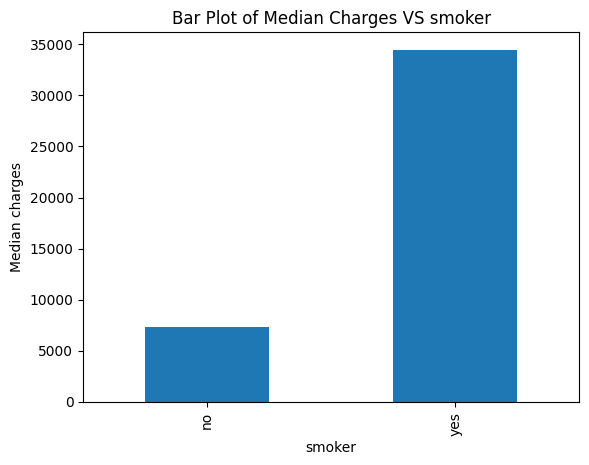

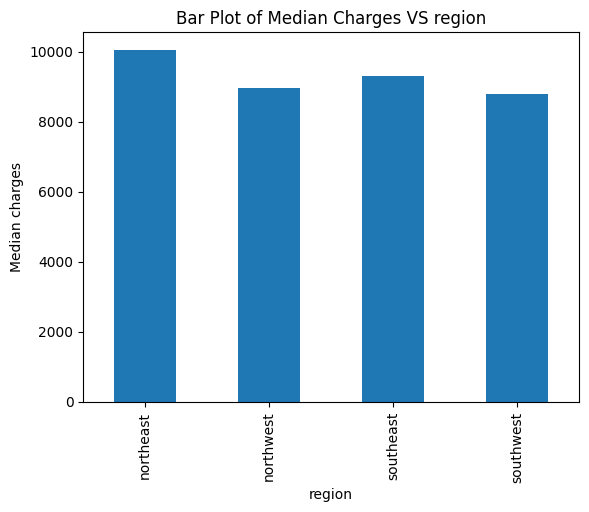

In [6]:
categorical_feat = [feature for feature in df.columns if df[feature].dtypes == 'O'] # Capturing categorical features

for feature in categorical_feat: # iterating through categorical features
    df.groupby(feature)['charges'].median().plot.bar()   # grouping the categories of the feature with 'charges' and plotting the median charges
    plt.ylabel('Median charges')
    plt.title("Bar Plot of Median Charges VS {}".format(feature))
    plt.show()

## Observations from the above plots:
   - ### Male and female have almost the same median charges. Thus, the feature 'sex' does not influence insurance charges.
   - ### Since the people who smoke have higher median charges than the people who don't, this indicates that the company don't want to risk their money by providing insurance to those people who are having higher chance to die - because of their smoking habits.
    

In [7]:
numerical_feat = [feature for feature in df.columns if df[feature].dtypes != 'O'] # capturing numerical features

discrete_features = [feature for feature in numerical_feat if df[feature].nunique() < 25 ] # capturing discrete features

continuous_feat = [feature for feature in numerical_feat if feature not in discrete_features] # capturing continuous features

print('Numerical features:  {}'.format(numerical_feat))
print('Discrete feature: {}'.format(discrete_features))
print("Continuous features: {}".format(continuous_feat))

Numerical features:  ['age', 'bmi', 'children', 'charges']
Discrete feature: ['children']
Continuous features: ['age', 'bmi', 'charges']


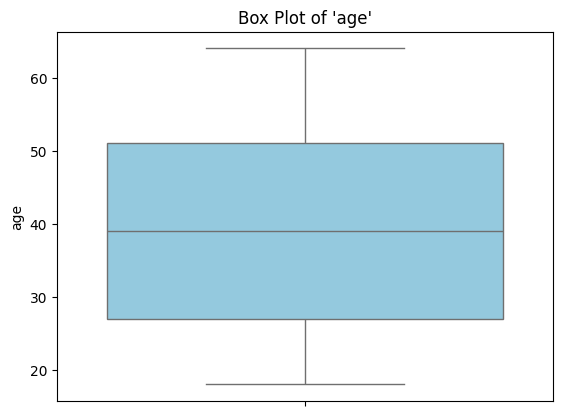

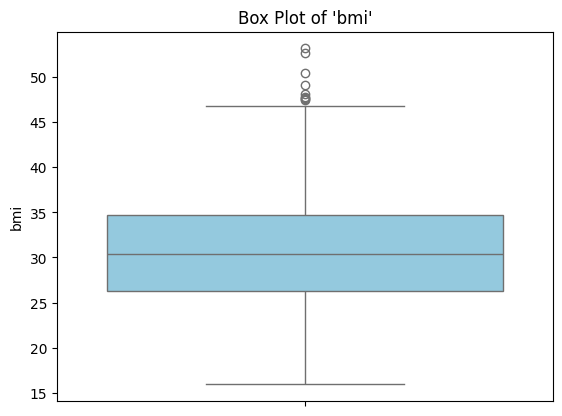

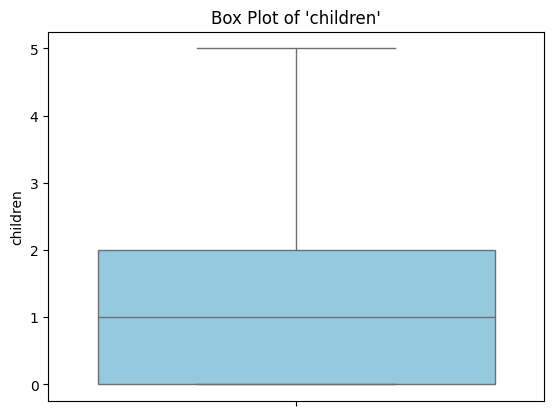

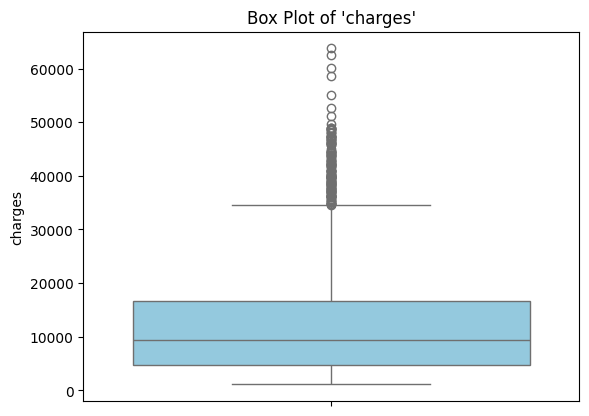

In [8]:
for feature in numerical_feat:
    sns.boxplot(df[feature],color='skyblue') # plotting box plot of numerical features
    plt.title("Box Plot of '{}'".format(feature))
    plt.show()

## Key observation from the above box plots
- ### The features - 'charges' and 'bmi' have outliers.

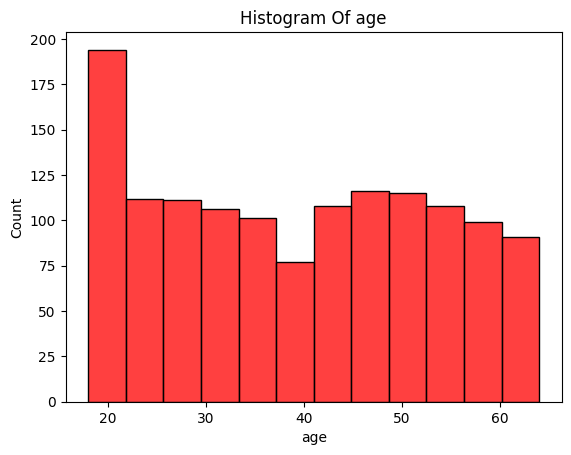

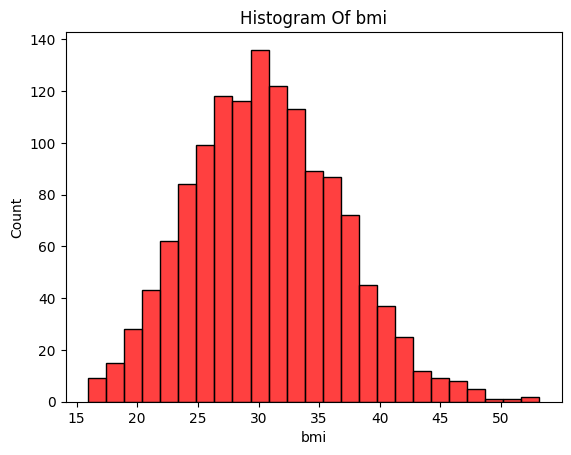

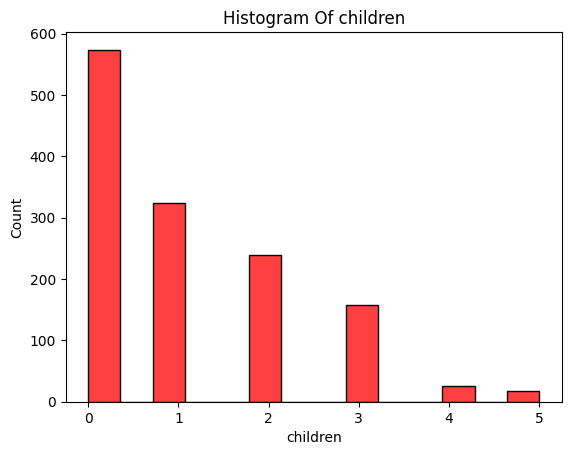

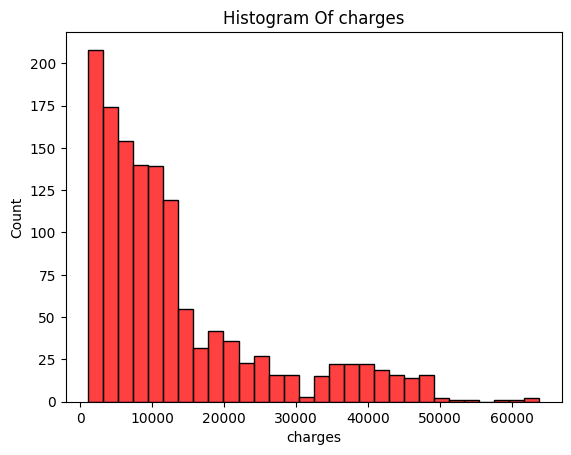

In [9]:
for feature in numerical_feat:
    sns.histplot(df[feature], color='red') # histogram of numerical features
    plt.title("Histogram Of {}".format(feature))
    plt.show()

## Key observations:
- ### The 'bmi' is following a normal distribution, and the average bmi is 30.

- ### 'charges' feature is following a log normal distribution.

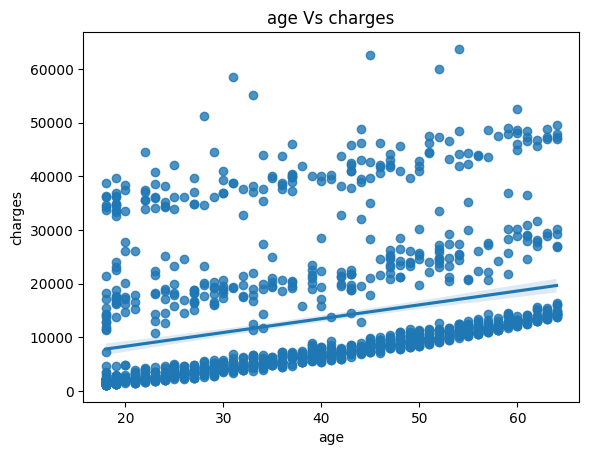

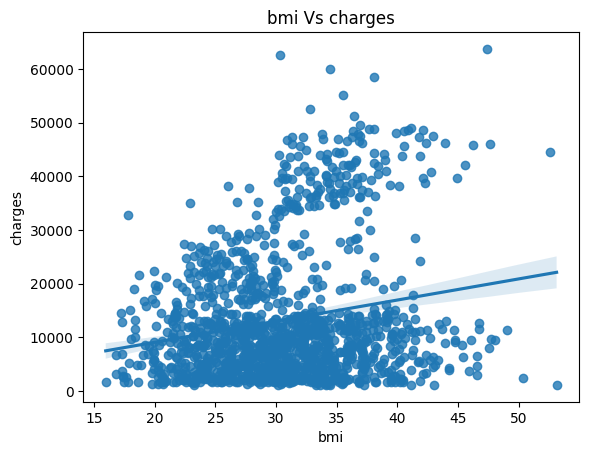

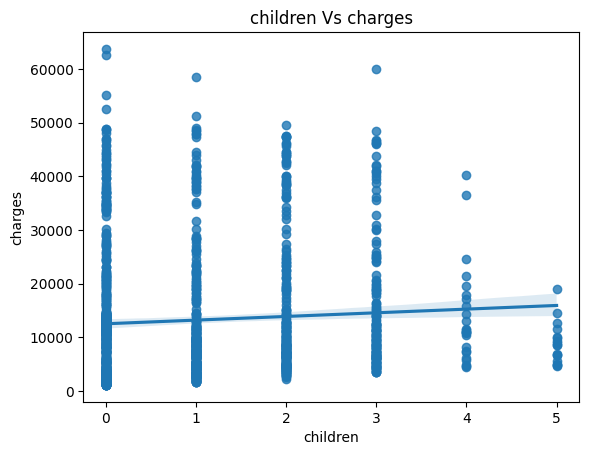

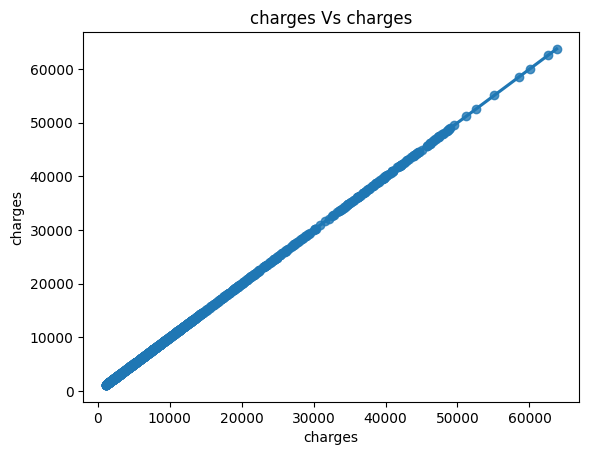

In [10]:
for feature in numerical_feat:
    sns.regplot(x = df[feature],y = df['charges']) # regression plot of numerical features vs 'charges'
    plt.title("{} Vs charges".format(feature))
    plt.show()

## Key observations:

- ### 'age' is having a strong linear relation with charges, which means if the age is higher - then the charges will also be higher.

- ### 'bmi' is having a non-linear relationship with charges.

In [11]:
for feature in categorical_feat:
    print("Value counts of '{}' column\n".format(df[feature].value_counts())) # printing the value counts of categorical features
    

Value counts of 'sex
male      676
female    662
Name: count, dtype: int64' column

Value counts of 'smoker
no     1064
yes     274
Name: count, dtype: int64' column

Value counts of 'region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64' column



In [12]:
for feature in numerical_feat: # Flagging the outliers
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    df["{}_outliers".format(feature)] = (df[feature] < lower_limit)| (df[feature] > upper_limit)
    
    print("Value counts of column {}".format(df["{}_outliers".format(feature)].value_counts()))
    outliers_values = df.loc[(df[feature] < lower_limit) | (df[feature] > upper_limit), feature].tolist()
    print(f"Outlier values in '{feature}': {outliers_values}\n")


Value counts of column age_outliers
False    1338
Name: count, dtype: int64
Outlier values in 'age': []

Value counts of column bmi_outliers
False    1329
True        9
Name: count, dtype: int64
Outlier values in 'bmi': [49.06, 48.07, 47.52, 47.41, 50.38, 47.6, 52.58, 47.74, 53.13]

Value counts of column children_outliers
False    1338
Name: count, dtype: int64
Outlier values in 'children': []

Value counts of column charges_outliers
False    1199
True      139
Name: count, dtype: int64
Outlier values in 'charges': [39611.7577, 36837.467, 37701.8768, 38711.0, 35585.576, 51194.55914, 39774.2763, 48173.361, 38709.176, 37742.5757, 47496.49445, 37165.1638, 39836.519, 43578.9394, 47291.055, 47055.5321, 39556.4945, 40720.55105, 36950.2567, 36149.4835, 48824.45, 43753.33705, 37133.8982, 34779.615, 38511.6283, 35160.13457, 47305.305, 44260.7499, 41097.16175, 43921.1837, 36219.40545, 46151.1245, 42856.838, 48549.17835, 47896.79135, 42112.2356, 38746.3551, 42124.5153, 34838.873, 35491.64, 42760

In [13]:
df.columns # re-check

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'age_outliers', 'bmi_outliers', 'children_outliers',
       'charges_outliers'],
      dtype='object')

## Doing train-test split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']], df['charges'], train_size=0.8, random_state=42) # Train-test split
X_train

,age,sex,bmi,children,smoker,region
560,46,female,19.950,2,no,northwest
1285,47,female,24.320,0,no,northeast
1142,52,female,24.860,0,no,southeast
969,39,female,34.320,5,no,southeast
486,54,female,21.470,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


## Applying Cross Validation

In [15]:
# Cross validation is performed before final model training in order to evaluate the model using different data sets (k folds)

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


log_then_scale = ['age', 'bmi']      # log1p → scaler
just_scale = ['children']          # only scaler
cat = ['sex', 'smoker', 'region']      # OHE → scaler

log_scale_pipe = Pipeline([
    ('log', FunctionTransformer(np.log1p)),
    ('scale', MinMaxScaler())
])

cat_pipe = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])


# Combining all in ColumnTransformer
preprocessor = ColumnTransformer([
    ('log_scale', log_scale_pipe, log_then_scale),
    ('scale', MinMaxScaler(), just_scale),
    ('cat_scale', cat_pipe, cat)
])

# Final pipeline with model
full_pipeline = Pipeline([
    ('prep', preprocessor),
    ('model', LinearRegression())
])



y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)
scores = cross_val_score(full_pipeline, X_train, y_train_log, cv=5, scoring='r2')

print("R2 scores on each fold:", scores)
print("Mean R2 score:", scores.mean())



R2 scores on each fold: [0.71826217 0.8124371  0.76118769 0.68620863 0.78605942]
Mean R2 score: 0.7528310045346653


#### Mean R2 is 0.72 this shows an average generalization power of the model — which mean it can be expected that model will explain 72% of variation on unseen data.


## Model training

In [16]:
full_pipeline.fit(X_train, y_train_log)
print("Test R2 score:", full_pipeline.score(X_test, y_test_log))

y_pred_log = full_pipeline.predict(X_test)
y_pred_actual = np.expm1(y_pred_log)
print("R2 Score on test data (expm1):", r2_score(y_test, y_pred_actual))

ytrain_pred_log = full_pipeline.predict(X_train)
ytrain_pred_actual = np.expm1(ytrain_pred_log)
print("R2 Score on train data (expm1):", r2_score(y_train, ytrain_pred_actual))

rmse_actual = np.sqrt(mean_squared_error(y_test, y_pred_actual))
print("RMSE in $ scale:",rmse_actual)

print("Mean Squared Error on test data:", mean_squared_error(y_test, y_pred_actual))


""" Manual preprocessing before model training is more preferred because, it allows model to perform transformation
on entire features, instead of providing features separately in the pipeline (like cat_pipe, log_than_scale, etc.) which I have done.

But. in this case, training with the full pipeline gave similar results, so I used the pipeline approach."""

Test R2 score: 0.8045580099655828
R2 Score on test data (expm1): 0.6632171700678274
R2 Score on train data (expm1): 0.5660335585004224
RMSE in $ scale: 7230.844150939742
Mean Squared Error on test data: 52285107.135179475


' Manual preprocessing before model training is more preferred because, it allows model to perform transformation\non entire features, instead of providing features separately in the pipeline (like cat_pipe, log_than_scale, etc.) which I have done.\n\nBut. in this case, training with the full pipeline gave similar results, so I used the pipeline approach.'


#### - The R2 score is 66%, which means the model has explained 66% of variation. This score can be increased by making another models.
#### - RMSE is of $7230, which is the averaged error

## Log transformation on train and test data of X and y

In [17]:
skewedFeatures = [feature for feature in X_train.columns if X_train[feature].dtypes != 'O' if (X_train[feature] > 0).all() if X_train[feature].nunique() > 25]  # getting skewed features
print('Features that are right skewed are: {}'.format(skewedFeatures))


Features that are right skewed are: ['age', 'bmi']


In [18]:
X_train_log = X_train.copy() # copying train and test data
X_test_log = X_test.copy()

for feature in skewedFeatures:
    # log transformation
    X_train_log[feature] = np.log1p(X_train_log[feature]) # log1p is safer to avoid undefined behavior of log(0). log1p(0) = log(1) = 0.
    X_test_log[feature] = np.log1p(X_test_log[feature])

y_train_log = np.log1p(y_train) # log transformation for output variable also
y_test_log = np.log1p(y_test)

X_train_log

,age,sex,bmi,children,smoker,region
560,3.850148,female,3.042139,2,no,northwest
1285,3.871201,female,3.231595,0,no,northeast
1142,3.970292,female,3.252697,0,no,southeast
969,3.688879,female,3.564449,5,no,southeast
486,4.007333,female,3.112181,3,no,northwest
...,...,...,...,...,...,...
1095,2.944439,female,3.476614,4,no,northeast
1130,3.688879,female,3.213662,5,no,southeast
1294,4.077537,male,3.264805,0,no,northeast
860,3.637586,female,3.883624,2,yes,southwest


## Encoding categorical columns

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


# Categorical columns to encode
categorical_cols = ['sex', 'smoker', 'region']

# ColumnTransformer helps to apply encoding only to selected columns

ct = ColumnTransformer(transformers=[('cat_enc', OneHotEncoder(drop='first',handle_unknown='ignore'),  categorical_cols)], remainder='passthrough') # 'cat_enc' is the name assigned to OneHotEncoder transformer

# passthrough numerical columns.
# drop='first' avoids multicollinearity in Linear Regression.
# remainder='passthrough' keeps numerical features untouched.

# Transforming the training and testing features
X_train_encoded = ct.fit_transform(X_train_log)
X_test_encoded = ct.transform(X_test_log)
X_train_encoded # since the output gives the shape of 1070, 8, this means that 3 numerical columns are there and 5 categorically encoded columns are there in x_train_encoded, because those columns have been converted into separate columns by dropping the first category (in alphabetical order).

array([[0.        , 0.        , 1.        , ..., 3.8501476 , 3.04213865,
        2.        ],
       [0.        , 0.        , 0.        , ..., 3.87120101, 3.2315946 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 3.97029191, 3.25269737,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 4.07753744, 3.26480476,
        0.        ],
       [0.        , 1.        , 0.        , ..., 3.63758616, 3.88362353,
        2.        ],
       [1.        , 0.        , 0.        , ..., 4.02535169, 3.43075618,
        0.        ]], shape=(1070, 8))

## Feature Scaling

In [20]:
from sklearn.preprocessing import MinMaxScaler # MinMaxScaler converts the values between 0-1

scaler = MinMaxScaler()

XtrainScaled = scaler.fit_transform(X_train_encoded)
XtestScaled = scaler.transform(X_test_encoded)
XtrainScaled

array([[0.        , 0.        , 1.        , ..., 0.73637943, 0.18205548,
        0.4       ],
       [0.        , 0.        , 0.        , ..., 0.75349674, 0.34530486,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.83406184, 0.36348858,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.92125699, 0.37392121,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.56355799, 0.90714161,
        0.4       ],
       [1.        , 0.        , 0.        , ..., 0.87882777, 0.51691733,
        0.        ]], shape=(1070, 8))

## Applying Polynomial transformation

### At first, using cross validation on Polynomial transformed features.

In [21]:
from sklearn.preprocessing import PolynomialFeatures # applying polynomial transformation to capture the non-linearity of features

# Column groups
log_poly_features = ['age', 'bmi']
poly_only_features = ['children']
categorical = ['sex', 'smoker', 'region']

# Pipeline for log → poly → scale (correct order)
log_poly_pipe = Pipeline([
    ('log', FunctionTransformer(np.log1p)),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scale', MinMaxScaler()),
   

])

# Pipeline for poly → scale
poly_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scale', MinMaxScaler())
])

# Categorical pipeline (no scaling here to avoid sparse error)
cat_pipe = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

# Creating ColumnTransformer to apply transformations on different feature types

preprocessor = ColumnTransformer([
    ('log_poly', log_poly_pipe, log_poly_features),
    ('poly_only', poly_pipe, poly_only_features),
    ('cat', cat_pipe, categorical)
])

# Final pipeline
full_pipeline = Pipeline([
    ('prep', preprocessor),
    ('model', LinearRegression())
])

# y log transform
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Applying cross-validation to evaluate model performance
scores = cross_val_score(full_pipeline, X_train, y_train_log, cv=5, scoring='r2')
print("CV R2 scores:", scores)
print("Mean CV R2 score:", scores.mean())

# Train model
full_pipeline.fit(X_train, y_train_log)

# Predict on test
y_pred_log = full_pipeline.predict(X_test)
y_pred_actual = np.expm1(y_pred_log)
print("Test R2 (original scale):", r2_score(y_test, y_pred_actual))

# Predict on train
ytrain_pred_log = full_pipeline.predict(X_train)
ytrain_pred_actual = np.expm1(ytrain_pred_log)
print("Train R2 (original scale):", r2_score(y_train, ytrain_pred_actual))

rmse_actual = np.sqrt(mean_squared_error(y_test, y_pred_actual))
print("RMSE in $ scale:",rmse_actual)
print("Mean Squared Error on test data:", mean_squared_error(y_test, y_pred_actual))

CV R2 scores: [0.721272   0.81231895 0.75817375 0.68942978 0.77896368]
Mean CV R2 score: 0.7520316339434162
Test R2 (original scale): 0.6351968492314359
Train R2 (original scale): 0.5407875112852261
RMSE in $ scale: 7525.63793980429
Mean Squared Error on test data: 56635226.40102176


### Using polynomial transformation before using linear model is giving bad accuracy when compared to directly applying linear regression model.

#### The RMSE is high, MSE is high and Test r2 score is less, which clearly shows that using polynomial transformation while using these pipelines is giving bad results.

### I have used pipelines to train the polynomial regression model but, in the next code cell I am applying all the preprocessing steps manually for polynomial transformation in order to check the model's performance.

## Applying polynomial features using manual preprocessing

In [22]:
poly = PolynomialFeatures(degree=2)
Xtrain_poly = poly.fit_transform(XtrainScaled)
Xtest_poly = poly.transform(XtestScaled)

# Training model
model_poly = LinearRegression()
model_poly.fit(Xtrain_poly, y_train_log)

# Making predictions on the test set
y_pred2 = model_poly.predict(Xtest_poly)

# Calculating and displaying R2 score on test data
print("R2 Score on test data (log1p):", r2_score(y_test_log, y_pred2))

y_pred_actual2 = np.expm1(y_pred2)
y_test_actual2 = np.expm1(y_test_log)
print("R2 Score on test data (expm1):", r2_score(y_test_actual2, y_pred_actual2))

ytrain_pred = model_poly.predict(Xtrain_poly)  # calculating r2 score on training data (after expm1 of ytrain_pred)
y_pred_actual3 = np.expm1(ytrain_pred) 
print("R2 Score on training data (expm1):", r2_score(y_train, y_pred_actual3))

rmse_actual = np.sqrt(mean_squared_error(y_test_actual2, y_pred_actual2))
print("RMSE in $ scale:",rmse_actual)
print("Mean Squared Error on test data:", mean_squared_error(y_test_actual2, y_pred_actual2))


R2 Score on test data (log1p): 0.8629841024004771
R2 Score on test data (expm1): 0.8514114091324424
R2 Score on training data (expm1): 0.8216376960956276
RMSE in $ scale: 4802.935586319937
Mean Squared Error on test data: 23068190.24633844


#### Since there is no significant difference between r2-train and r2-test, therefore the model has performed exceptionally well after polynomial transformation. The R2 score of the model is 0.85

### Ideally, PolynomialFeatures should be applied before scaling to avoid distortion of interaction terms. But in practice, if scaling-before-poly improves performance, it's acceptable. Also, I have applied PolynomialFeatures after OneHotEncoded features which is still acceptable as it is giving great results.


## Applying hyperparameter tuning

In [23]:
from sklearn.linear_model import Ridge # using ridge because, linear regression has no hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression

# Ridge model
model = Ridge()

# Grid of alpha values
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Performing alpha tuning using GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid.fit(XtrainScaled, y_train_log)

print("Best alpha:", grid.best_params_)
print("Best MSE Score:", -grid.best_score_)


Best alpha: {'alpha': 0.1}
Best MSE Score: 0.44958164694265534


### The alpha value of 0.1 is best for training the model using Ridge.

In [24]:
y_pred=grid.predict(XtestScaled)
print("R2:",r2_score(y_test, np.expm1(y_pred)))

print("Mean Squared Error: ", mean_squared_error(y_test, np.expm1(y_pred)))

print("Rooted Mean Squared Error in $:", np.sqrt(mean_squared_error(y_test, np.expm1(y_pred))))


R2: 0.6639723222988034
Mean Squared Error:  52167870.70923728
Rooted Mean Squared Error in $: 7222.732911387301


### Ridge is not giving higher r2, also, it is giving high error, therefore it is not a best model.

## PolynomialFeatures were applied to all features (including one-hot encoded) because it empirically gave better results on this dataset. Hence, polynomial transformation before directly using linear regression gave better and impressive results. Thus, applying PolynomialFeatures before using Linear regression creates a best model for predicting accurate medical charges.